In [1]:
# importing all necessery modules
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score, classification_report, f1_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Rating_Prediction_data.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Ratings', 'Full_review'], dtype='object')

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df

,Ratings,Full_review
0,5,Its an absolute beast if u know what are the n...
1,5,This is the best laptop in this range.I reciev...
2,5,Good product as used of now.... Everything is ...
3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,For that price... it's exceptionally good. Pla...
...,...,...
39364,5,This device completely covers my bunglow.. Goo...
39365,5,"a great product from tenda,....i literally kee..."
39366,3,Good router bt Flipkart fluctuates it's price....
39367,4,Too much gd...lokking nice and fit..range is a...


In [43]:
# Defining Function for Word Clouds
def Word_Cloud(str_List):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in str_List:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [45]:
df.Ratings.unique()

array([5, 4, 3, 1, 2], dtype=int64)

RATINGS : 5


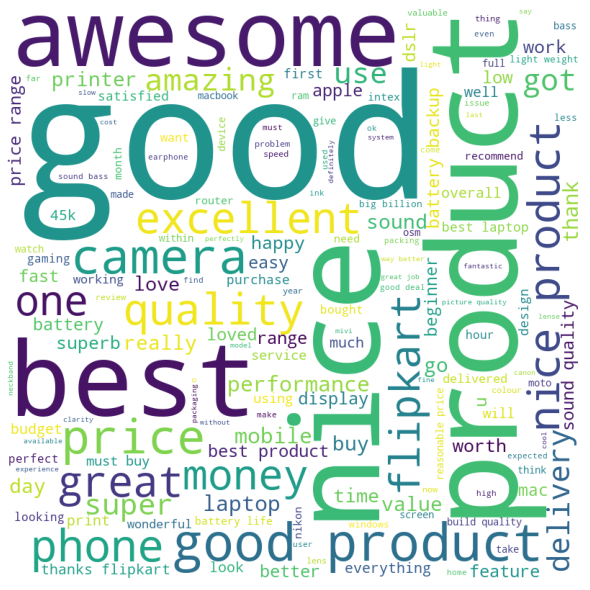


RATINGS : 4


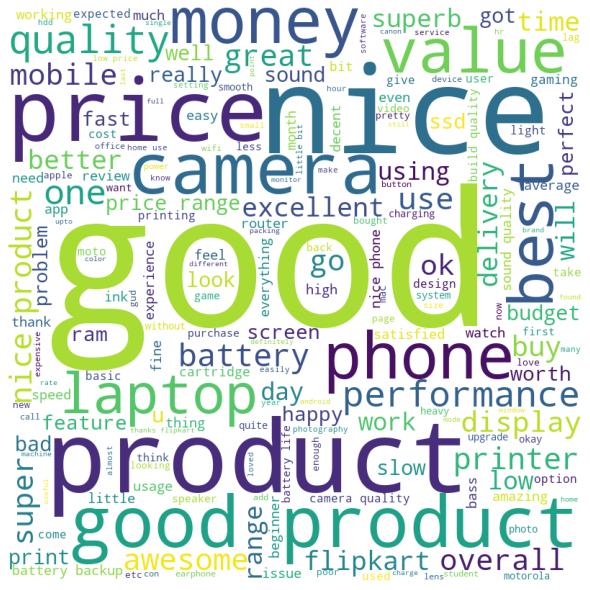


RATINGS : 3


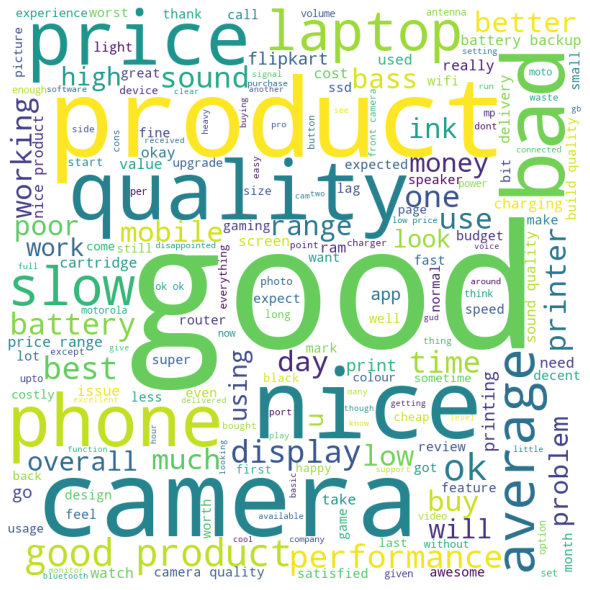


RATINGS : 1


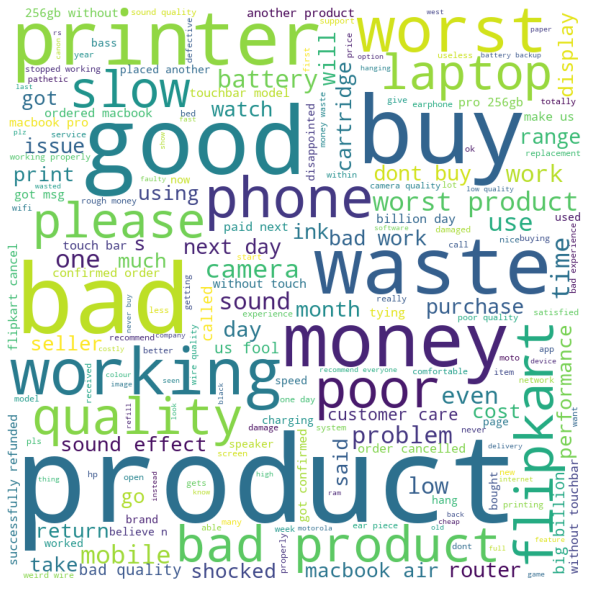


RATINGS : 2


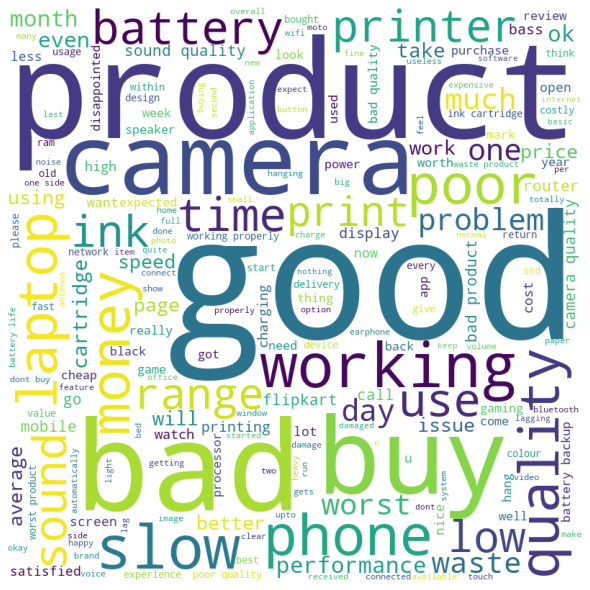

In [47]:
for i in list(df.Ratings.unique()):
    print("RATINGS :", i)
    Word_Cloud(list(df[df.Ratings == i].sample(n=1500).Full_review))
    print()

In [8]:
# Defining Input data and Output to be predicted
X = df.Full_review
y = df.Ratings

In [9]:
# Splitting the train_df into training and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

In [10]:
vectorizer = TfidfVectorizer(min_df =1,stop_words='english',use_idf=True,analyzer='word',
                             ngram_range=(1,1),max_features=15000)
x_train = vectorizer.fit_transform(X_train)
x_test  = vectorizer.transform(X_test)

In [80]:
# Random Forest Model

In [11]:
rand = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=None,class_weight='balanced')
rand.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None)

In [12]:
prediction = rand.predict(x_test)

In [13]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test, prediction))
print('\n','ACCURACY','\n',accuracy_score(y_test, prediction))
print('\n','REPORT','\n',classification_report(y_test,prediction))


 CONFUSION MATRIX 
 [[ 732  124   53   64  111]
 [ 154   47   57   41   51]
 [ 111   61  111  178  190]
 [  50   37  113  580  638]
 [ 122   64  146 1230 2809]]

 ACCURACY 
 0.5434340868681737

 REPORT 
               precision    recall  f1-score   support

           1       0.63      0.68      0.65      1084
           2       0.14      0.13      0.14       350
           3       0.23      0.17      0.20       651
           4       0.28      0.41      0.33      1418
           5       0.74      0.64      0.69      4371

    accuracy                           0.54      7874
   macro avg       0.40      0.41      0.40      7874
weighted avg       0.57      0.54      0.55      7874



The Accuracy is very less. So Transforming into a binary classification Problem with only High Rating and Low Rating 

In [14]:
Target = list(df.Ratings)

In [63]:
out = []
for i in Target:
    if i == 5 or i == 4:
        out.append(1)
    elif i == 1 or i == 2:
        out.append(0)
    else:
        out.append("Neutral")        

In [64]:
df["Target"] = out

In [79]:
df.Target.unique()

array([1, 'Neutral', 0], dtype=object)

High Rated Reviews


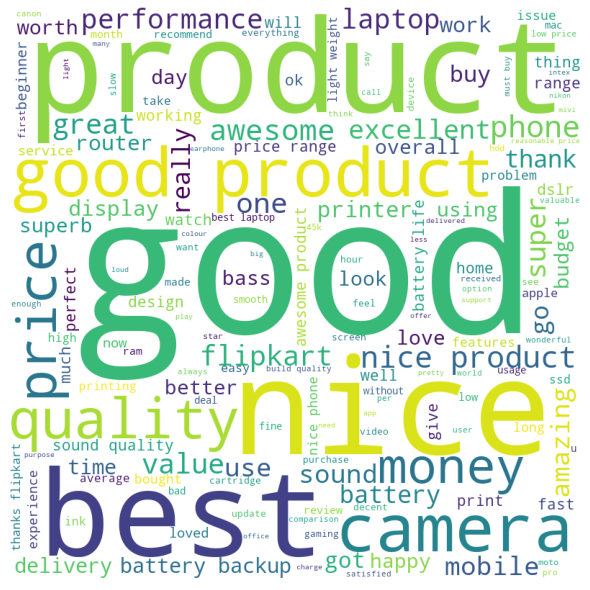


Neutral Reviews


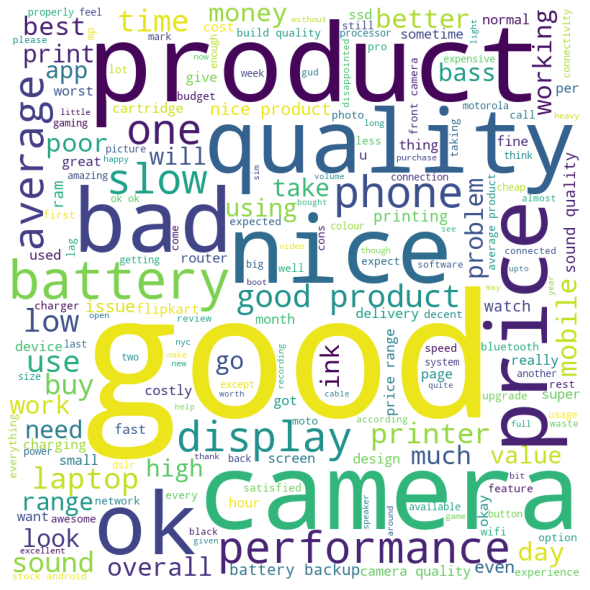


Worst Rated Reviews


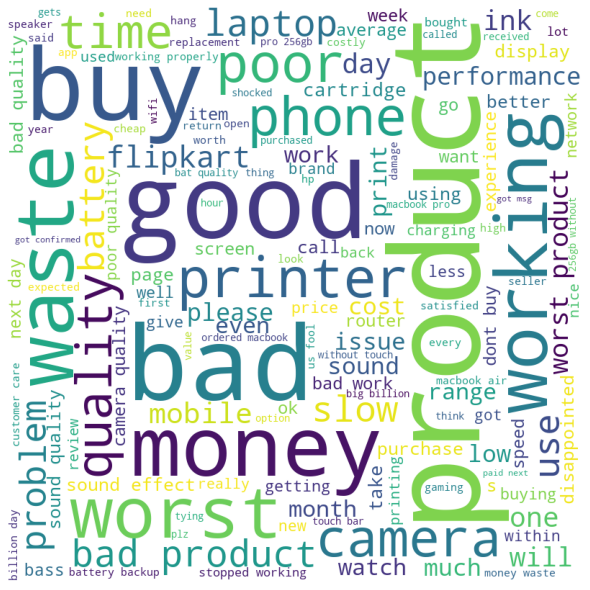

In [76]:
for i in list(df.Target.unique()):
    if i == 1:
        print("High Rated Reviews")
    elif i == 0:
        print("Worst Rated Reviews")
    else:
        print("Neutral Reviews")
    Word_Cloud(list(df[df.Target == i].sample(n=1500).Full_review))
    print()

In [65]:
df2 = df[df.Target != "Neutral"]

In [66]:
# Defining Input data and Output to be predicted
X2 = df2.Full_review
y2 = list(df2.Target)

In [67]:
# Splitting the train_df into training and test dataset
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=88)

In [68]:
vectorizer = TfidfVectorizer(min_df =1,stop_words='english',use_idf=True,analyzer='word',
                             ngram_range=(1,1),max_features=15000)
x_train2 = vectorizer.fit_transform(X_train2)
x_test2  = vectorizer.transform(X_test2)

In [69]:
rand = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=None,class_weight='balanced')
rand.fit(x_train2, y_train2)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None)

In [70]:
prediction = rand.predict(x_test2)

In [71]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test2, prediction))
print('\n','ACCURACY','\n',accuracy_score(y_test2, prediction))
print('\n','REPORT','\n',classification_report(y_test2,prediction))


 CONFUSION MATRIX 
 [[1127  324]
 [ 248 5538]]

 ACCURACY 
 0.9209617244714661

 REPORT 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1451
           1       0.94      0.96      0.95      5786

    accuracy                           0.92      7237
   macro avg       0.88      0.87      0.87      7237
weighted avg       0.92      0.92      0.92      7237



In [72]:
logisticRegr = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=5,tol=0.001,max_iter=1000)
logisticRegr.fit(x_train2, y_train2)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=5,
                   solver='liblinear', tol=0.001)

In [73]:
prediction2 = logisticRegr.predict(x_test2)

In [74]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test2, prediction2))
print('\n','ACCURACY','\n',accuracy_score(y_test2, prediction2))
print('\n','REPORT','\n',classification_report(y_test2,prediction2))


 CONFUSION MATRIX 
 [[1263  188]
 [ 449 5337]]

 ACCURACY 
 0.9119801022523145

 REPORT 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80      1451
           1       0.97      0.92      0.94      5786

    accuracy                           0.91      7237
   macro avg       0.85      0.90      0.87      7237
weighted avg       0.92      0.91      0.91      7237

